In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [239]:
df = pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [241]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [242]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


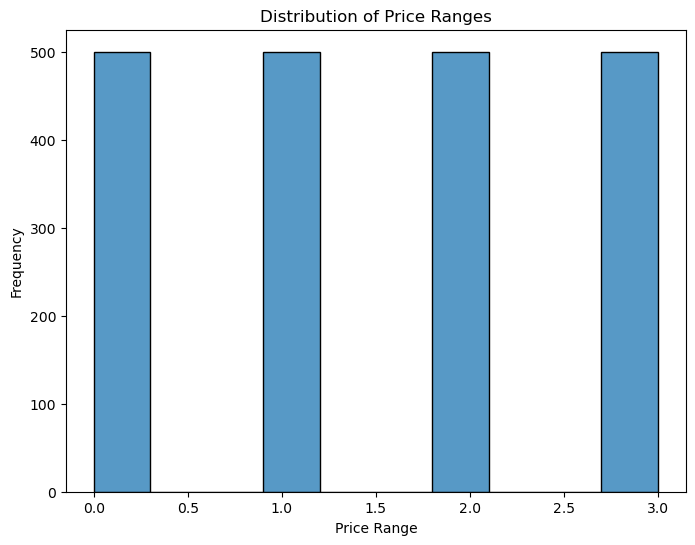

In [243]:
plt.figure(figsize=(8,6))
sns.histplot(df['price_range'], bins=10)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

##### We can see below using the z_score method that we have 12 outliers (unusual) datapoints (a values that are far away from the mean or median of the dataset) 

In [244]:
z_scores = (df - df.mean()) / df.std()
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_outliers = df[~filtered_entries]
print('Outliers:')
df_outliers

Outliers:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18.0,0.0,7.0,1.0,196.0,3.0,...,942.0,1179.0,3616.0,13.0,5.0,12,1,1,1,3
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
217,1336,0,0.9,0,5.0,1.0,17.0,NaN,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1
226,1708,1,2.4,1,18.0,1.0,49.0,0.1,109.0,1.0,...,233.0,517.0,3388.0,6.0,4.0,16,1,1,1,3
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
305,1348,0,2.0,0,18.0,0.0,52.0,0.3,98.0,3.0,...,1869.0,1942.0,955.0,18.0,11.0,7,1,1,1,1


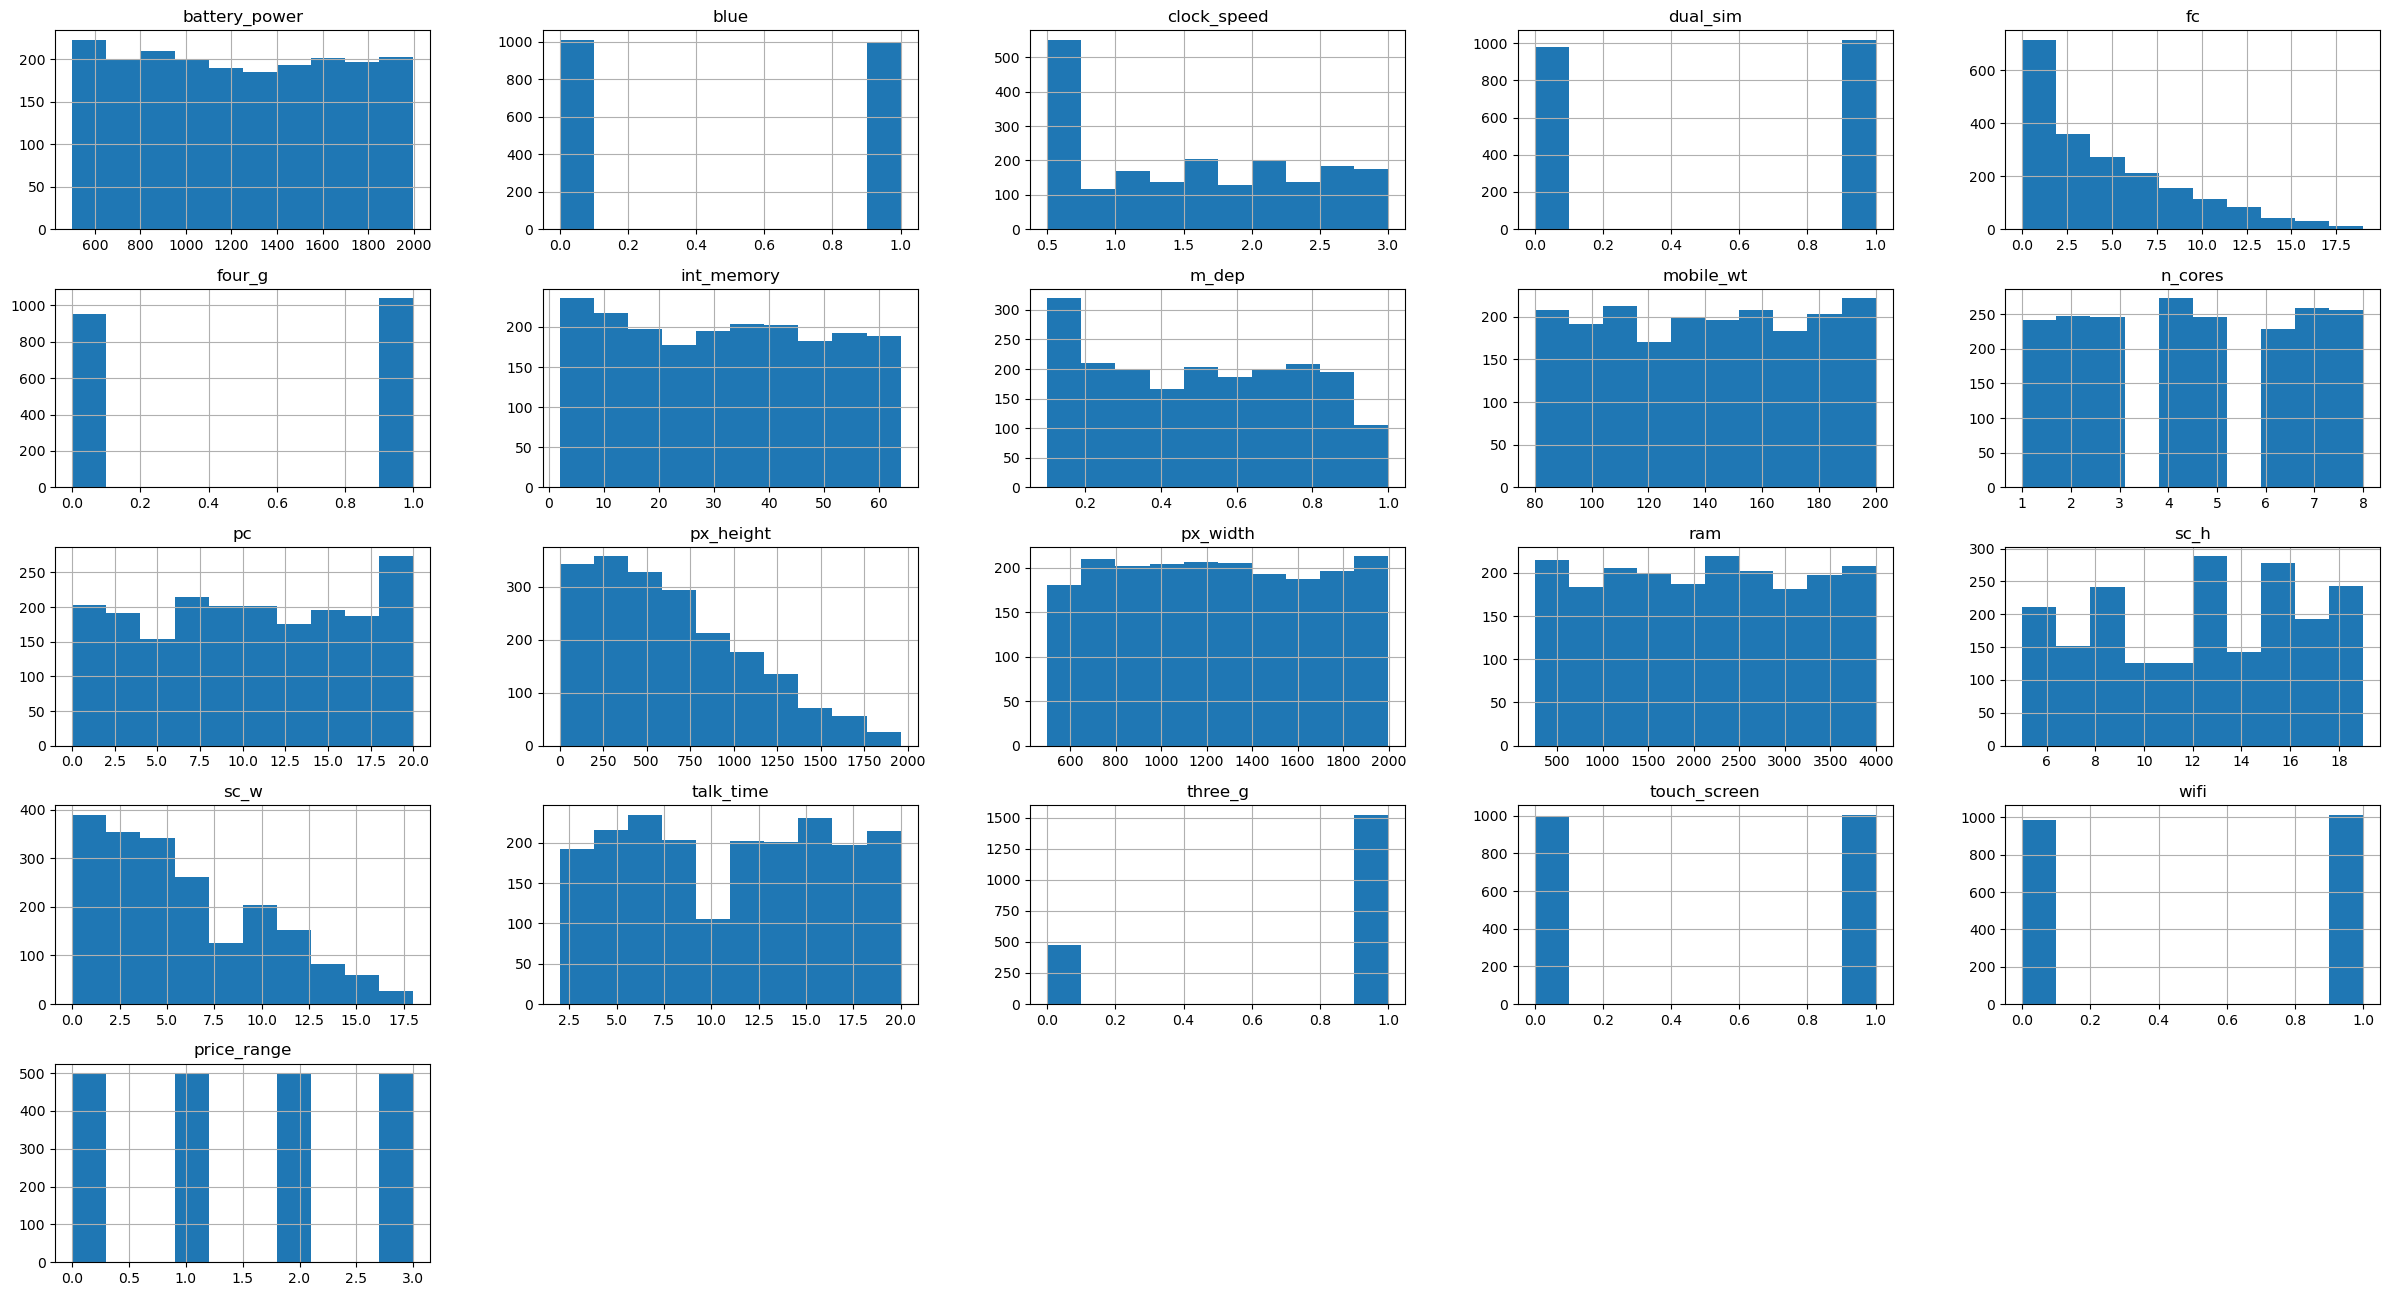

In [245]:
df.hist(figsize=(30, 16))
plt.show()

In [246]:
df['fc'].fillna(df['fc'].mean(), inplace=True)
df['four_g'].fillna(df['four_g'].mean(), inplace=True)
df['int_memory'].fillna(df['int_memory'].mean(), inplace=True)
df['m_dep'].fillna(df['m_dep'].mean(), inplace=True)
df['mobile_wt'].fillna(df['mobile_wt'].mean(), inplace=True)
df['n_cores'].fillna(df['n_cores'].mean(), inplace=True)
df['pc'].fillna(df['pc'].mean(), inplace=True)
df['px_height'].fillna(df['px_height'].mean(), inplace=True)
df['px_width'].fillna(df['px_width'].mean(), inplace=True)
df['ram'].fillna(df['ram'].mean(), inplace=True)
df['sc_h'].fillna(df['sc_h'].mean(), inplace=True)
df['sc_w'].fillna(df['sc_w'].mean(), inplace=True)

In [247]:
columns_to_normalize = ['battery_power', 'clock_speed', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'talk_time', 'fc', 'pc', 'sc_w', 'sc_h', 'm_dep']
means = df[columns_to_normalize].mean()
stds = df[columns_to_normalize].std()

# Normalize columns
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - means[x.name]) / stds[x.name])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902372,0,0.830572,0,-0.764438,0.0,-1.382059,0.339191,1.350339,2.0,...,-1.410331,-1.146137,0.391561,-0.784470,0.283179,1.462128,0,0,1,1
1,-0.495015,1,-1.252751,1,-0.995367,1.0,1.156044,0.686209,-0.120697,3.0,...,0.587811,1.704813,0.467155,1.115173,-0.635029,-0.734084,1,1,0,2
2,-1.537302,1,-1.252751,1,-0.533509,1.0,0.493930,1.380246,0.133906,5.0,...,1.396098,1.075383,0.441343,-0.309559,-0.864581,-0.368048,1,1,0,2
3,-1.418964,1,1.198217,0,-0.995367,0.0,-1.216531,1.033228,-0.262142,6.0,...,1.289982,1.237369,0.594376,0.877717,0.512731,-0.002013,1,0,0,2
4,1.325574,1,-0.394912,0,2.006707,1.0,0.659459,0.339191,0.020749,2.0,...,1.271920,-0.090915,-0.657548,-1.021925,-0.864581,0.730057,1,1,0,1


In [248]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [249]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

#### Before Normalization:
##### we can see feature importances are all very close to zero, which suggests that none of the features have a strong linear relationship with the price range this can be thrown off by the fact some values has more extreme values than others. meaning they most likely have non-linear realtion with each other.

#### After Normalization:
##### Below we can see some feature importance are start to show illustrating the benefits of the normalization we did.

In [250]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print('Mean Squared Error:', mean_squared_error(y_val, y_pred))

# Identify the most linearly important features
feature_importances = model.coef_
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.2f}')


Mean Squared Error: 0.10214522132321288
Feature Importances:
battery_power: 0.22
blue: -0.01
clock_speed: -0.00
dual_sim: -0.03
fc: 0.00
four_g: -0.00
int_memory: 0.01
m_dep: -0.00
mobile_wt: -0.03
n_cores: 0.00
pc: -0.00
px_height: 0.12
px_width: 0.12
ram: 1.03
sc_h: 0.00
sc_w: 0.00
talk_time: -0.00
three_g: 0.02
touch_screen: 0.01
wifi: -0.02


### Below we use the LogisticRegression as our classification model

In [251]:
model = LogisticRegression(max_iter=1000, solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [252]:
y_pred = model.predict(X_val)

In [253]:
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.95      0.93      0.94        98
           2       0.95      0.96      0.95        98
           3       1.00      0.98      0.99       121

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



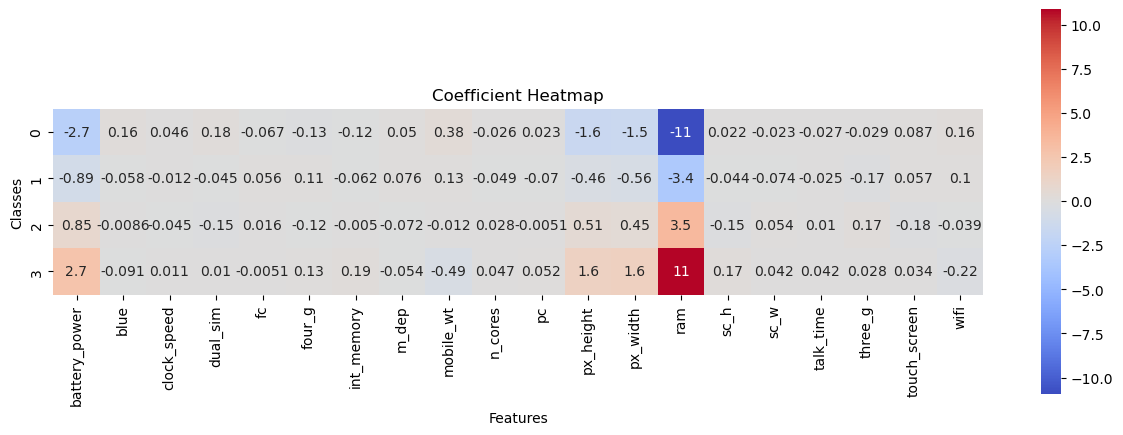

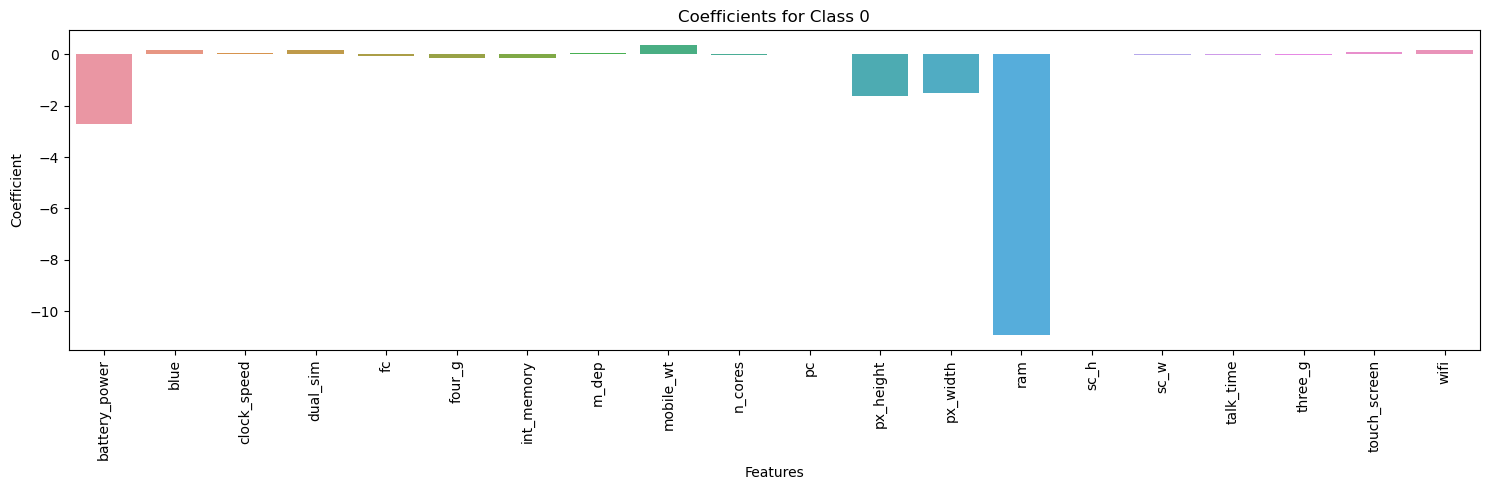

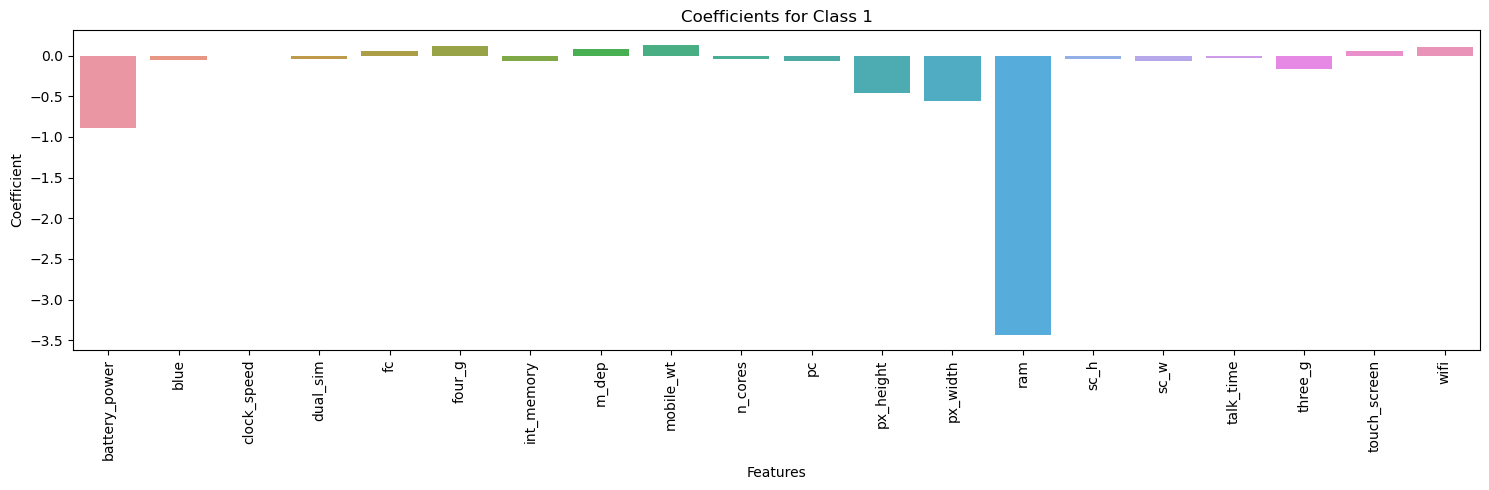

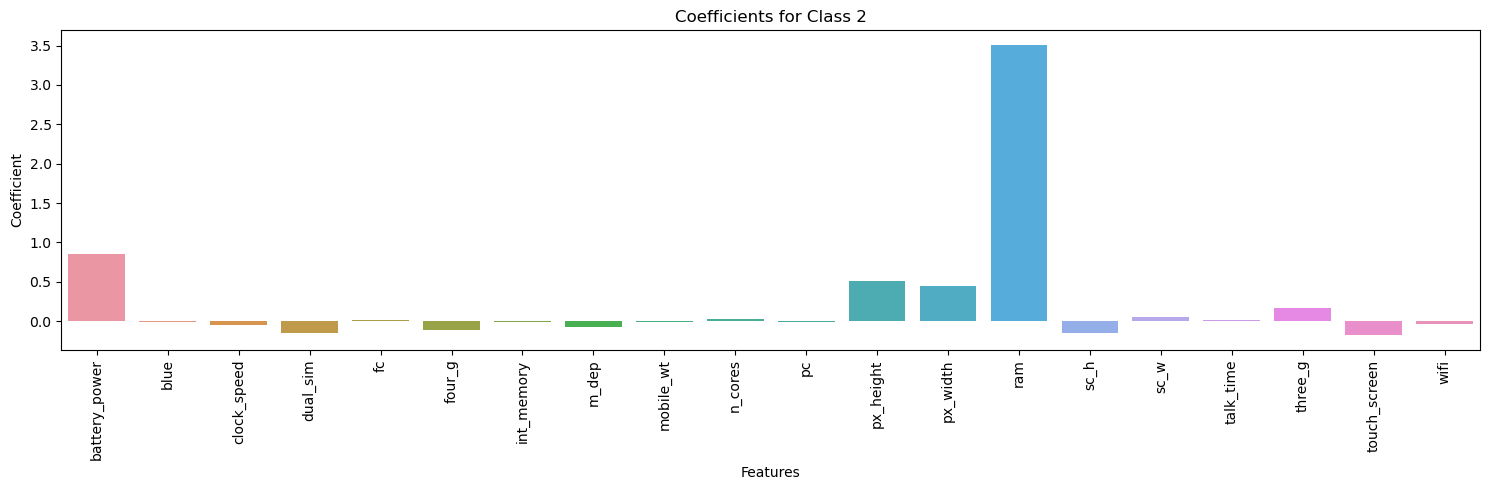

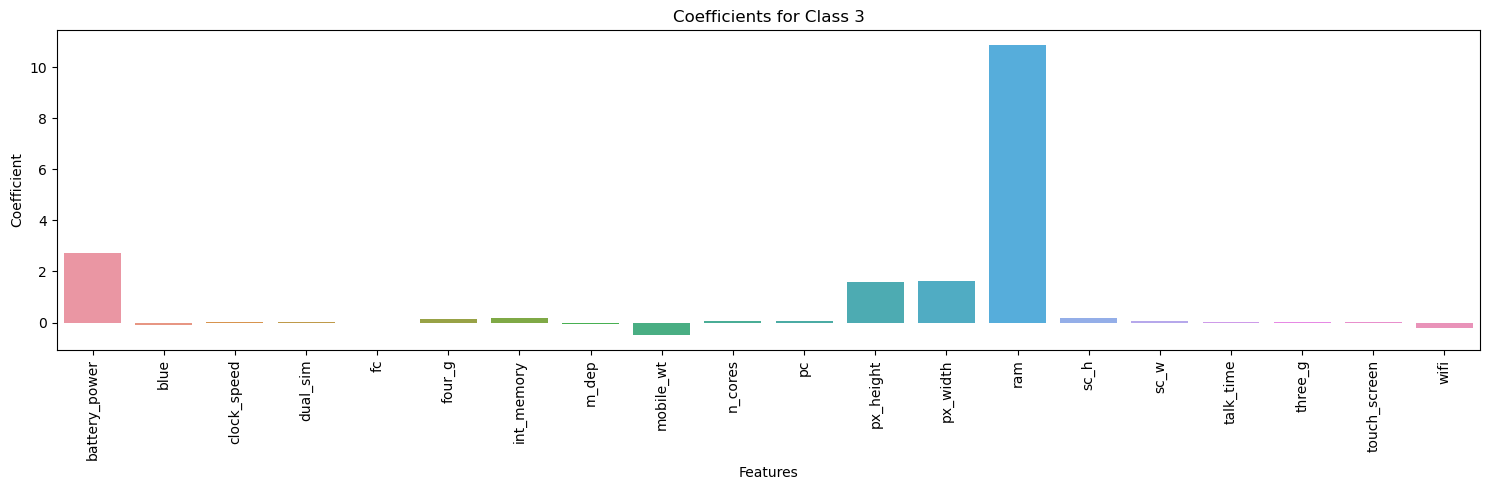

In [254]:

# Get the coefficients for each class
coefficients = model.coef_

importance_df = []
for i, class_name in enumerate(model.classes_):
    class_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients[i]})
    class_df['Class'] = class_name
    importance_df.append(class_df)

importance_df = pd.concat(importance_df)

# Create a heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(coefficients, annot=True, cmap='coolwarm', square=True, xticklabels=X_train.columns, yticklabels=model.classes_)
plt.xlabel('Features')
plt.ylabel('Classes')
plt.title('Coefficient Heatmap')
plt.show()

# Create a bar plot for each class
for i, class_name in enumerate(model.classes_):
    class_df = importance_df[importance_df['Class'] == class_name]
    plt.figure(figsize=(15,5)) 
    sns.barplot(x='Feature', y='Coefficient', data=class_df)
    plt.title(f'Coefficients for Class {class_name}')
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    plt.xticks(rotation=90)
    plt.tight_layout()  
    plt.show()

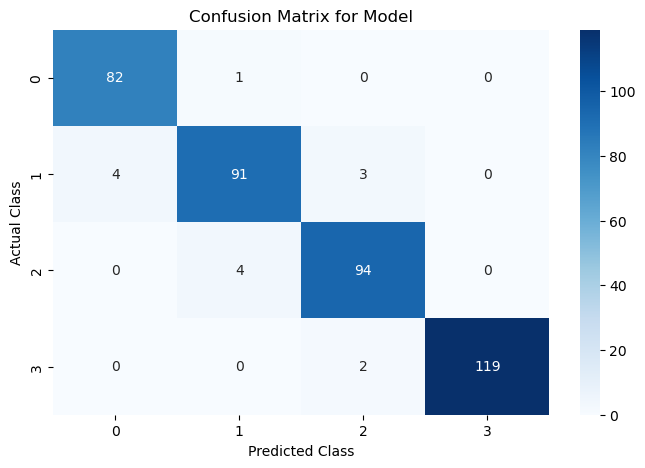

In [255]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for Model")
plt.show()

In [256]:
import joblib
joblib.dump(model, '../fastapi-service/model.joblib')
joblib.dump((columns_to_normalize, means, stds), '../fastapi-service/normalization_params.joblib')

['../fastapi-service/normalization_params.joblib']

In [257]:
loaded_model = joblib.load('../fastapi-service/model.joblib')
normalization_params = joblib.load('../fastapi-service/normalization_params.joblib')
columns_to_normalize, means, stds = normalization_params

In [258]:
X_test = pd.read_csv('test.csv')
sampled_devices = X_test.sample(10)

In [259]:
sampled_devices[columns_to_normalize] = sampled_devices[columns_to_normalize].apply(lambda x: (x - means[x.name]) / stds[x.name])

In [260]:
sampled_devices.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
226,227,1.054762,0,-1.252751,0,-0.764438,1,1.211221,-0.354846,-0.262142,...,-1.308203,1.055173,0.756039,-1.627374,0.165352,1.430940,-1.100119,1,1,0
536,537,-1.134497,0,1.810959,1,-0.995367,1,0.824987,0.686209,0.727978,...,-0.812408,-0.513989,-1.516390,1.340184,0.640262,-0.175925,1.645145,1,1,1
778,779,1.550872,1,1.198217,0,0.390206,1,-1.326883,-0.354846,1.520073,...,-0.481878,-0.127908,-0.292240,-0.023289,-0.547014,-0.175925,-1.283136,1,1,1
414,415,-1.321107,1,1.075668,0,-0.995367,1,0.328402,1.727265,-1.308840,...,-1.473468,-0.374006,0.112724,0.424749,1.590083,-0.864581,-0.551066,1,0,0
907,908,-0.875063,1,1.320765,1,-0.764438,1,0.714635,-0.007827,0.614821,...,0.344447,-1.344855,-0.243645,0.177683,-0.072104,-0.175925,1.279110,1,1,1


In [261]:
predictions = loaded_model.predict(sampled_devices.drop('id', axis=1))

In [262]:
print("Device IDs and Predictions:")
for id, prediction in zip(sampled_devices['id'], predictions):
    print(f"ID: {id}, Prediction: {prediction}")

Device IDs and Predictions:
ID: 227, Prediction: 0
ID: 537, Prediction: 2
ID: 779, Prediction: 2
ID: 415, Prediction: 2
ID: 908, Prediction: 1
ID: 139, Prediction: 3
ID: 171, Prediction: 0
ID: 867, Prediction: 1
ID: 245, Prediction: 1
ID: 742, Prediction: 1
